# Домашнее задание к лекции "Визуализация данных"
Обязательная часть
Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).
Откуда брать данные?

Можете взять свои рабочие данные, либо найти открытые данные (например, на kaggle.com) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:

 - данные приложений из Google Play;
 - данные о видео из трендов YouTube;
 - данные об уровне счастья в разных странах;
 - данные по фильмам и сериалам Netflix.

Дополнительная часть (необязательная)
построить дополнительно не менее 2 визуализаций (итого не менее 6);
в работе должны присутствовать следующие визуализации: 
- boxplot, 
- heatmap, 
- scatter plot matrix;

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import missingno as msno 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.options.mode.chained_assignment = None  # default='warn'

df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


Text(0.5, 1.0, 'Тип контента представленный на Netflix')

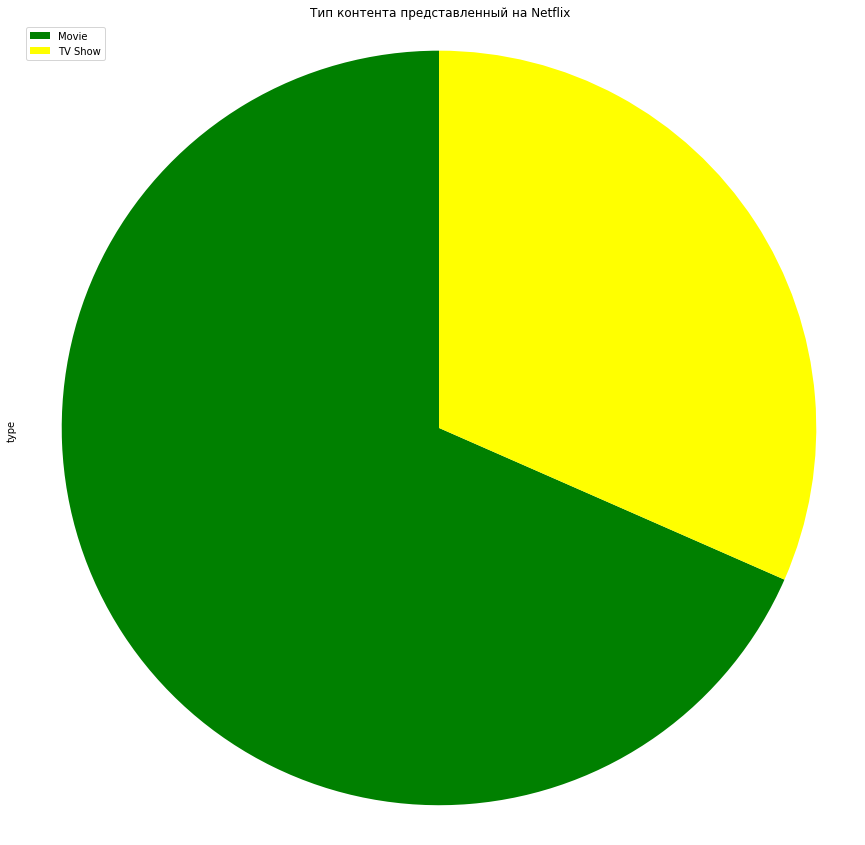

In [2]:
# проанализируем доли типов контента
fig, ax = plt.subplots(figsize=(15, 15))
df['type'].value_counts().sort_index(axis = 0).plot(
    kind='pie', startangle=90, labeldistance=None, colors=('green', 'yellow')
)
ax.axis('equal')
ax.legend()
ax.set_title('Тип контента представленный на Netflix')

In [3]:
# можно сделать вывод, что фильмов на площадке больше

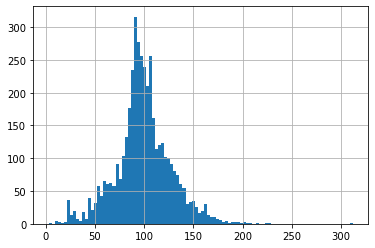

In [4]:
# поработаем с продолжительностью по времени, отфильтруем по фильмам, т.к. продолжительность сериалов в сезонах
df_movie = df[df['type'] == 'Movie']

# переведем продолжительность в число
df_movie['duration'] = df_movie['duration'].map(lambda x: x.rstrip(' min'))
df_movie['duration'] = df_movie['duration'].map(lambda x: int(x))
#set(df_movie['duration'])

# отрисуем гистограмму по продолжительности:
df_movie['duration'].hist(bins = 100)

In [5]:
# вывод, чаще всего фильм длится ~90мин

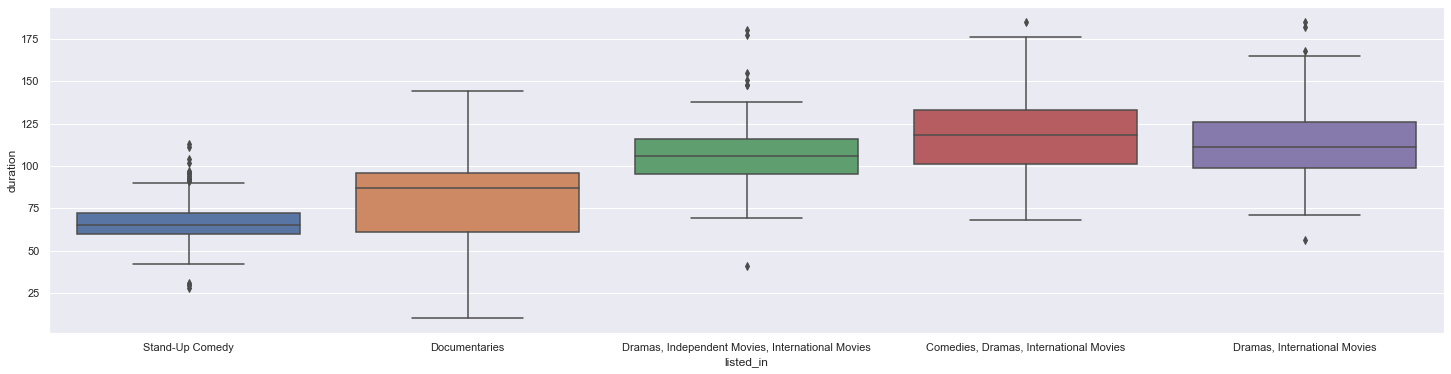

In [6]:
# топ 5 по продолжительности в жанрах
def boxplot_of_categories(data_frame, categorical_column, numerical_column, limit):
    plt.figure(figsize=(25, 6))
    keys = []
    for i in dict(Counter(df_movie[categorical_column].values).most_common(limit)):
        keys.append(i)
    df_new = df_movie[df_movie[categorical_column].isin(keys)]
    sns.set()
    sns.boxplot(x = df_new[categorical_column], y = df_new[numerical_column])
boxplot_of_categories(df_movie, 'listed_in', 'duration', 5)

In [7]:
# можно сделать вывод, что фильмы в категории "Comedies, Dramas, International Movies" 
# чаще всего самые продолжительные, от ~100 до ~140 минут

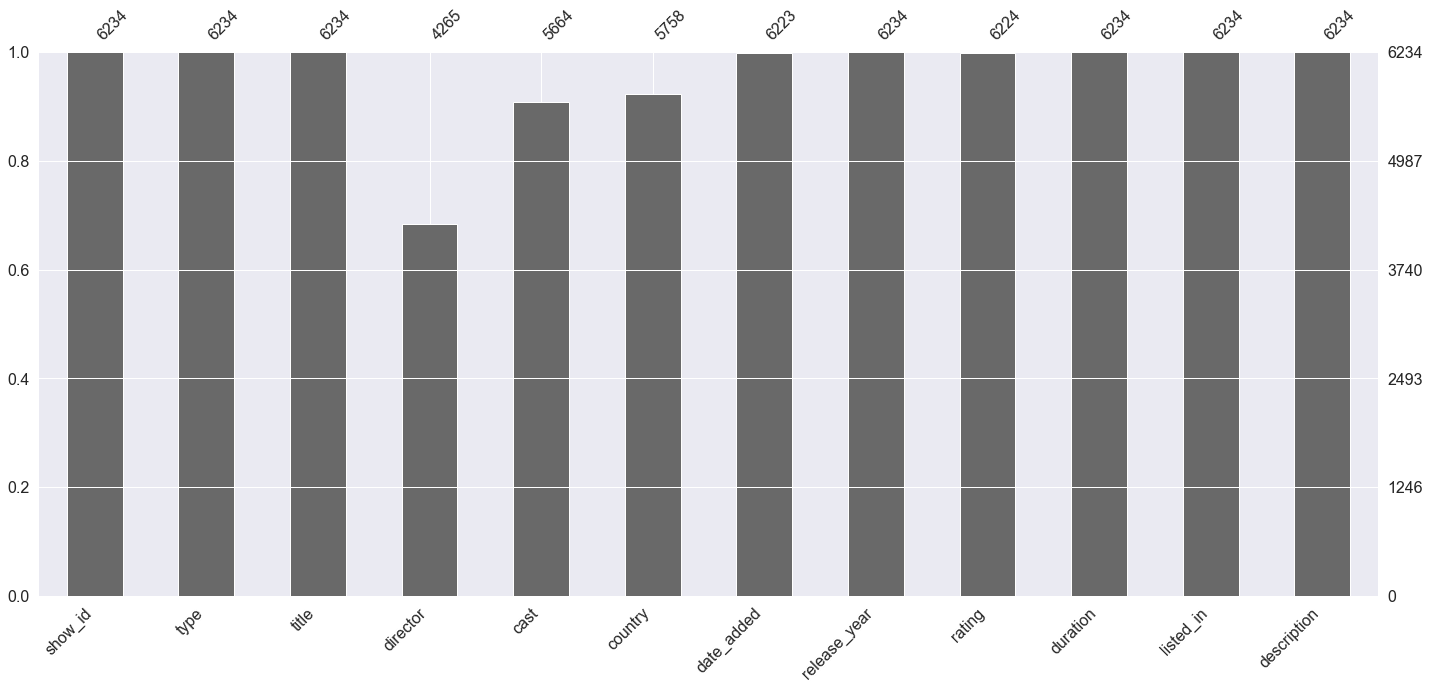

In [8]:
# проанализируем пропуски
msno.bar(df) 

In [9]:
# очевидно, что больше всего пропусков в столбцах director, cast, country